## Some Instructions

This classification is done in two parts:

1) Without train-test split(Using normal procedure).

2) With train-test split(Using Pipeline)

### WITH NORMAL PROCEDURE

In [2]:
import pandas as pd

In [3]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length']= messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

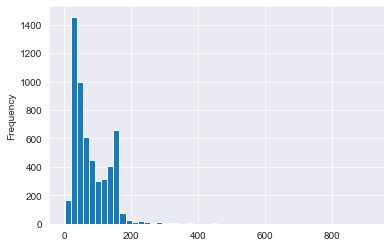

In [8]:
messages['length'].plot(bins=50, kind='hist')

In [9]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [10]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021720EAAB88>,
      dtype=object)

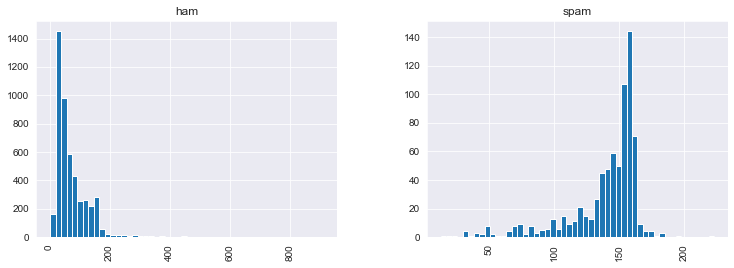

In [11]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [12]:
import string

In [13]:
import nltk

In [14]:
#nltk.download_shell()

In [15]:
from nltk.corpus import stopwords

In [47]:
#Function to remove stopwords and punctuations
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc= ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [19]:
print(len(bow_transformer.vocabulary_))

11425


In [48]:
#Checking for single message
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [21]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [22]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [23]:
messages_bow = bow_transformer.transform(messages['message'])

In [24]:
print(messages_bow.shape)

(5572, 11425)


In [25]:
messages_bow.nnz

50548

In [26]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [27]:
#TF-IDF of the words in corpus

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [36]:
print(messages_tfidf.shape)

(5572, 11425)


In [37]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [38]:
predictions = spam_detect_model.predict(messages_tfidf)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print (classification_report(messages['label'], predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## NOW USING PIPEPLINE AND TRAIN/TEST SPLIT

In [42]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test =train_test_split(messages['message'], messages['label'], test_size=0.3)

In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors Naive Bayes classifier
])

In [44]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002172237DAF8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [45]:
predictions = pipeline.predict(msg_test)

In [46]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      1520
        spam       0.64      1.00      0.78       152

    accuracy                           0.95      1672
   macro avg       0.82      0.97      0.88      1672
weighted avg       0.97      0.95      0.95      1672

